In [99]:
!pip install -q transformers

In [100]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image as img
from IPython.display import Image, display
from google.colab import drive
drive.mount('/content/drive')
shorts_recommended = 'https://i1.adis.ws/i/ArsenalDirect/n01085_f?$810x810$&.jpg'
trouser_reccomended = 'https://dynamic-cdn.zenegal.store/fit-in/700x1050/products/44660/boys-denim-16553747402251.jpg'
heels_reccomended = 'https://news.harvard.edu/wp-content/uploads/2022/02/20220218_dresscode-1200x800.jpg'
tshirt_reccomended = 'https://media.gq-magazine.co.uk/photos/61322ed91b9f7f21be316427/master/w_1920,h_1280,c_limit/030921_BlackTees_03.jpg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
FILE_NAME = '/content/drive/MyDrive/DeepLearning/coat.jpeg'

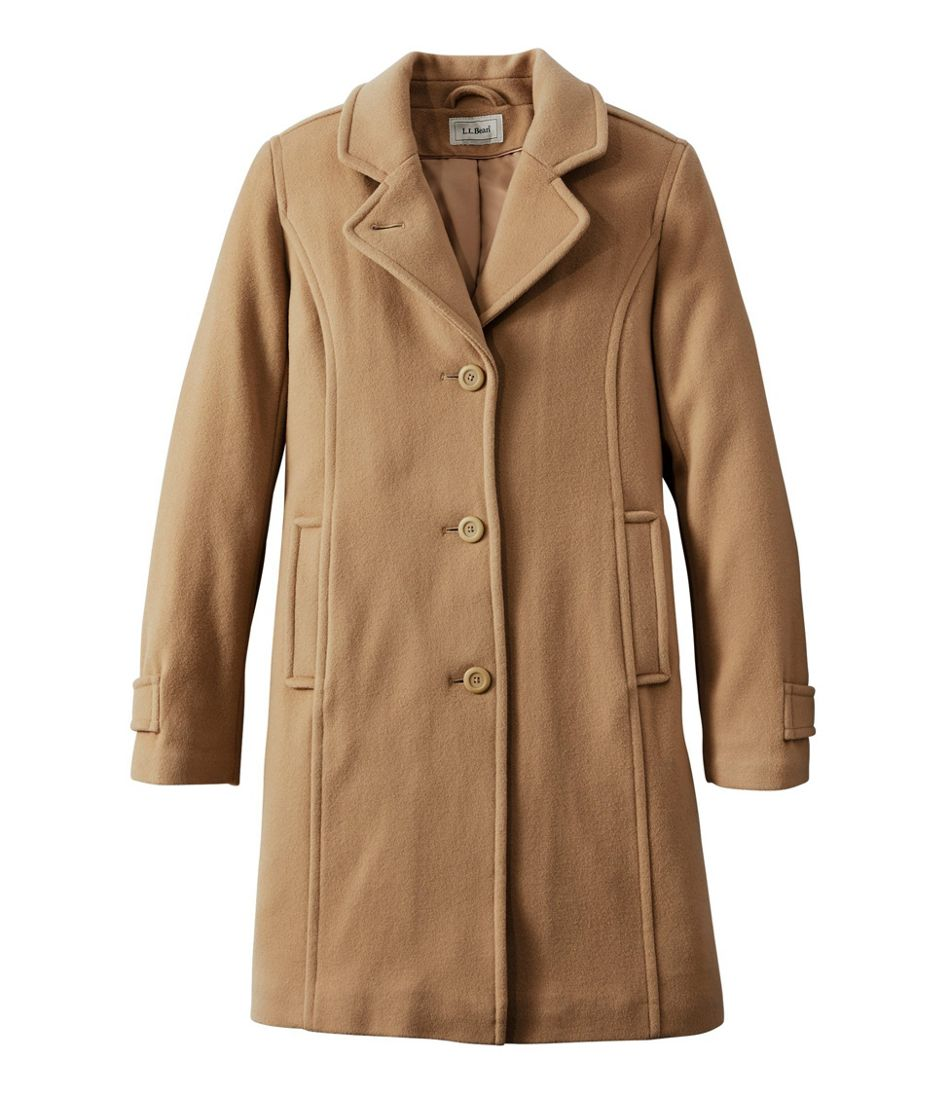

In [115]:
display(Image(FILE_NAME, width = 700, height = 400))

In [116]:
image_array = img.open(FILE_NAME)

In [117]:
feature_extractor = ViTFeatureExtractor.from_pretrained('abhishek/autotrain_fashion_mnist_vit_base')
model = ViTForImageClassification.from_pretrained('abhishek/autotrain_fashion_mnist_vit_base')

# Extract Features

In [118]:
inputs = feature_extractor(images = image_array, 
                           return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

# Make Predictions

In [119]:
predicted_class_idx = logits.argmax(-1).item()

In [120]:
print(predicted_class_idx)

2


In [121]:
prediction = model.config.id2label[predicted_class_idx]
print("Predicted class:", prediction)


Predicted class: Coat


Coat has been input, reccomended outfit shown below;


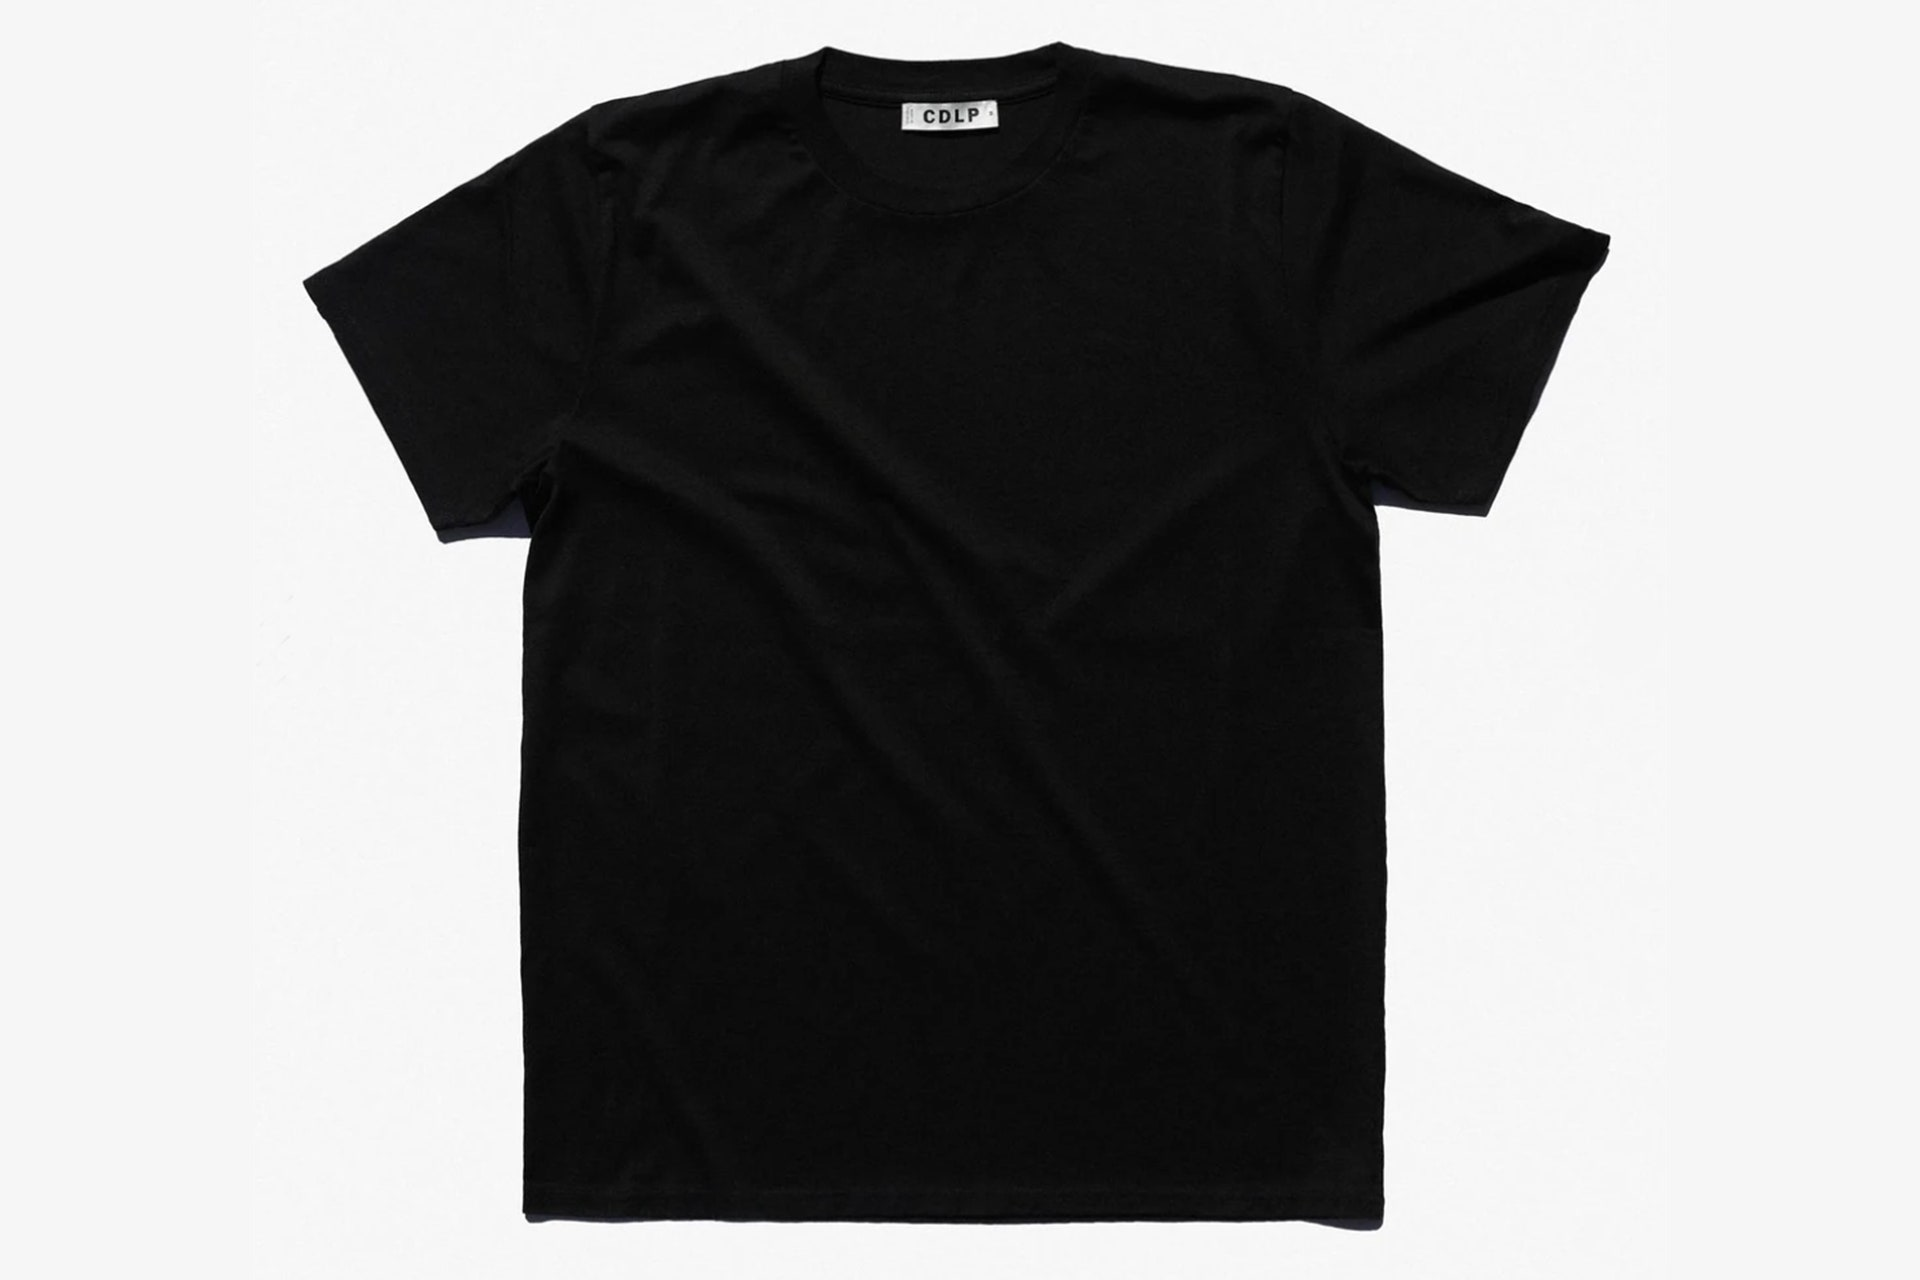

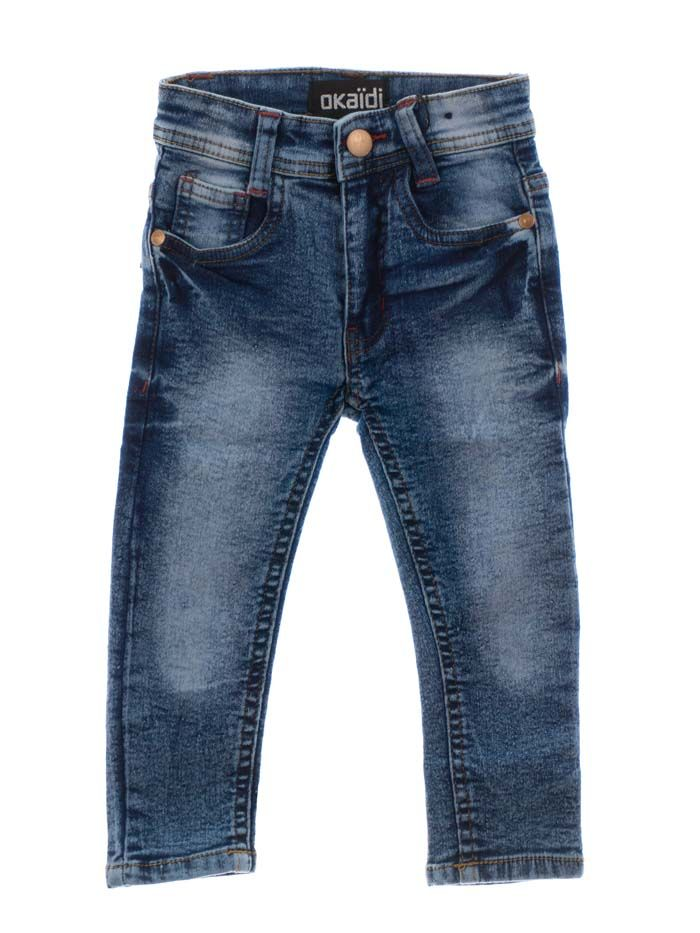

In [122]:
if prediction == "T - shirt / top" :
  print("T-Shirt has been input, reccomended outfit shown below;")
  display(Image(shorts_recommended))
elif prediction == ("Trouser"):
  print("Trouser has been input, reccomended outfit shown below;")
  display(Image(tshirt_reccomended))
elif prediction == ("Ankle boot") or prediction == ('Sneaker'):
  print("Shoes have been input, reccomended outfit shown below;")
  display(Image(shorts_recommended))
  display(Image(trouser_reccomended))
elif prediction == ("Pullover"):
  print("Long Sleeved Tshirt/Shirt has been input, reccomended outfit shown below;")
  display(Image(shorts_recommended))
  display(Image(trouser_reccomended))
elif prediction == ("Dress"):
  print("Dress has been input, reccomended outfit shown below;")
  display(Image(heels_reccomended))
elif prediction == ("Coat"):
  print("Coat has been input, reccomended outfit shown below;")
  display(Image(tshirt_reccomended))
  display(Image(trouser_reccomended))
elif prediction == ("Shirt"):
  print("Shirt has been input, reccomended outfit shown below;")
  display(Image(trouser_reccomended))